# Movie Recommender

## Librerias a utilizar

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ast import literal_eval

In [2]:
data_movies = pd.read_csv('C:\\Users\\Isaac Suazo\\movie_recommender_api\\tmdb_5000_movies.csv',na_filter=False)

data_credits = pd.read_csv('C:\\Users\\Isaac Suazo\\movie_recommender_api\\tmdb_5000_credits.csv')

In [6]:

data_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


## Unimos columnas de librerias

In [9]:
data_credits.columns = ['id','tittle','cast','crew']
data_movies = data_movies.merge(data_credits,on='id')

In [10]:
data_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


## Eliminamos columnas que no utlizaremos

In [12]:
data_movies = data_movies.drop(columns = [
    'tittle', 'tagline', 'status', 'homepage', 'keywords',
    'crew', 'vote_count', 'vote_average', 'spoken_languages',
    'runtime', 'popularity', 'production_companies', 'budget',
    'production_countries', 'release_date', 'revenue', 'title',
    'original_language'
])

In [13]:
data_movies.head(2)

,genres,id,original_title,overview,cast
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."


## Mapeamos genres y cast

In [14]:
features = ['cast', 'genres']
for feature in features:
    data_movies[feature] = data_movies[feature].apply(literal_eval)

In [15]:
def get_list(meta_data):
    if isinstance(meta_data, list):
        names = [col['name'] for col in meta_data]
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [16]:
features = ['cast','genres']
for feature in features:
    data_movies[feature] = data_movies[feature].apply(get_list)

In [17]:
data_movies.head(2)

,genres,id,original_title,overview,cast
0,"[Action, Adventure, Fantasy]",19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]"
1,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]"


## Verificamos que no tenemos datos nulos

In [18]:
data_movies.isnull().sum()

genres            0
id                0
original_title    0
overview          0
cast              0
dtype: int64

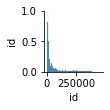

In [20]:
sns.pairplot(data_movies, height=1.5)

In [21]:
data_movies

,genres,id,original_title,overview,cast
0,"[Action, Adventure, Fantasy]",19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]"
1,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]"
2,"[Action, Adventure, Crime]",206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]"
3,"[Action, Crime, Drama]",49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]"
4,"[Action, Adventure, Science Fiction]",49529,John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]"
...,...,...,...,...,...
4798,"[Action, Crime, Thriller]",9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua..."
4799,"[Comedy, Romance]",72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[Edward Burns, Kerry Bishé, Marsha Dietlein]"
4800,"[Comedy, Drama, Romance]",231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[Eric Mabius, Kristin Booth, Crystal Lowe]"
4801,[],126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[Daniel Henney, Eliza Coupe, Bill Paxton]"


## Buscar por title

In [22]:
data_movies[data_movies['original_title'].str.contains('Avatar')]


,genres,id,original_title,overview,cast
0,"[Action, Adventure, Fantasy]",19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]"


#### Luego de validar lo demas lo haremos en vs_code

In [26]:
data_movies.to_csv('movie_data.csv.zip', index=False)

In [27]:
data_zip = pd.read_csv('movie_data.csv.zip')

#### Comprobados que se comprimio correctamente

In [29]:
data_zip

,genres,id,original_title,overview,cast
0,"['Action', 'Adventure', 'Fantasy']",19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ..."
1,"['Adventure', 'Fantasy', 'Action']",285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight..."
2,"['Action', 'Adventure', 'Crime']",206647,Spectre,A cryptic message from Bond’s past sends him o...,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo..."
3,"['Action', 'Crime', 'Drama']",49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"['Christian Bale', 'Michael Caine', 'Gary Oldm..."
4,"['Action', 'Adventure', 'Science Fiction']",49529,John Carter,"John Carter is a war-weary, former military ca...","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo..."
...,...,...,...,...,...
4798,"['Action', 'Crime', 'Thriller']",9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M..."
4799,"['Comedy', 'Romance']",72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"['Edward Burns', 'Kerry Bishé', 'Marsha Dietle..."
4800,"['Comedy', 'Drama', 'Romance']",231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","['Eric Mabius', 'Kristin Booth', 'Crystal Lowe']"
4801,[],126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,"['Daniel Henney', 'Eliza Coupe', 'Bill Paxton']"
